# K-Nearest Neighbors

### Learning Objectives

- Have a firm understanding of KNN algorithm
- Practice running through the data science workflow to solve a problem
- Demonstrate how to translate a mathematical algoritm into effective code 
- Understand common pitfalls when working with distances 
- Determine class balance in classification problems 
- Use Euclidian-distance to find the distance between vectors
- Code KNN from scratch  
- Implement KNN using sklearn

### Importing the data set and exploratory data analysis

For this tutorial, we will be using a database from the UC Irvine Machine Learning Repositiory that can be downloaded from the following link:
[_Human Activity Recognition Using Smartphones Data Set_](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).  

Please see the [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/) to explore the data files further.

In this assignment, we will try to classify the type of activity a person is performing based on measurements collected from a smartphone. The activities include:  
- Walking
- Walking_Upstairs
- Walking_Downstairs
- Sitting
- Standing
- Laying



Before coding an algorithm, we will take a look at our data using `Python`'s `pandas`. For visualizations, we will use the `matplotlib` ans `seaborn` libraries.

Let's import the necessary libraries and load the datasets. We will be using using the pandas `pd.read_table()` function. 

In [1]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

FEATURE_NAMES = './data/features.txt'
TRAIN_DATA = './data/X_train.txt'
TRAIN_LABELS = './data/y_train.txt'

# Load the data into a `pandas` DataFrame objects

# read feature names
feats = pd.read_csv(FEATURE_NAMES, sep='\n', header=None)

# read in training data
har_train = pd.read_csv(TRAIN_DATA, sep='\s+', header=None)

# read in training labels
har_train_labels = pd.read_csv(TRAIN_LABELS, sep='\n', header=None, names=["label"], squeeze = True)

har_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


Next, we assign each feature name in `feats` to each column of `har_train` using the `.columns` attribute and we visuaize the first 5 rows.

In [3]:
har_train.columns = feats.iloc[:, 0].values
har_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


Next, we will extract the first 20 features of the dataframe `har_train`.


Next, using the `seaborn` library, we will create a heatmap for the correlation matrix. 

First we have to create the correlation matrix from the pandas dataframe and then plot it using seaborn with these customizations:

- Set the seaborn style to white.
- Generate a mask using `np.triu(np.ones_like())` with the dtype as boolean to only show the lower triangle of the correlation matrix. Save it in a variable called `mask`.
- Set up the figure with matplotlib with `figsize=(11,9)`. Use `fig, ax = ...`
- Generate a custom diverging colormap for the heatmap with the arguments `(220, 10, as_cmap=True)`. Save it in a variable called `cmap`.
- Draw the heatmap with the mask and correct aspect ratio,  using the arguments `corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})`.
- Finally, use `fig.tight_layout()` just before saving the plot to produce a nicely centered graph.

You can find more information about how to create a heatmap using seaborn [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

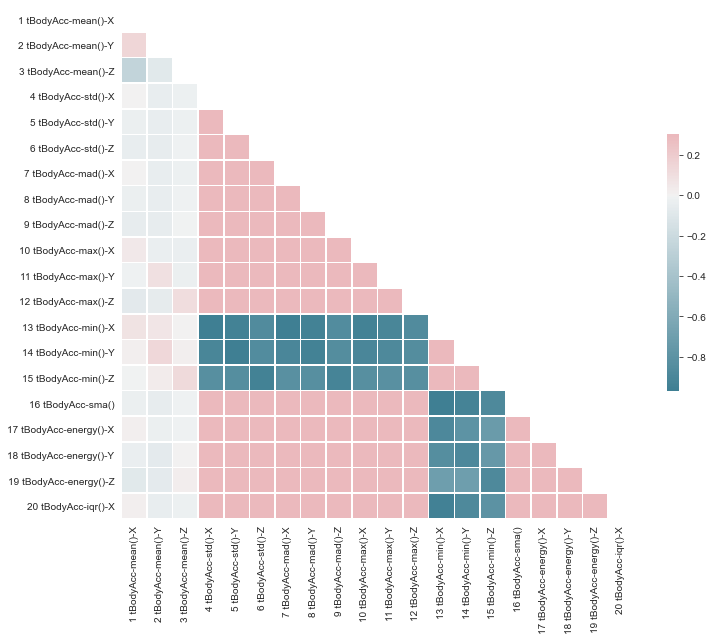

In [4]:
# extract the first 20 features
first_twenty = har_train.iloc[:, :20] 
# compute correlation matrix
corr = first_twenty.corr()

sns.set_style("white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
fig.tight_layout()

As an observation, a large imbalance in the distribution of the target variable categories can cause machine learning algorithms to perform differently. In this case, the algorithm can perform well with the majority class and poorly on the minority class.

As a final note, EDA should be performed at the beginning of each project and should be tailored to your specific problem to develop and understanding of the data for a particular purpose. Sometimes this could be a time consuming process when the data are large with many features.

Having performed EDA, we define a "test" data-set that will help us evaluate different models.  

The attribute `train_test_split` from the `sklearn.model_selection` module provides an easy way to do this.  

We will set `test_size=.3` and `random_state=24` for reproducibility.

In [5]:
from sklearn.model_selection import train_test_split

# give to targets and observations conventional names
y = har_train_labels 
X = har_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

## Code K-Nearest Neighbours (KNN)

Before fitting a model using KNN and the built-in modules of the `sklearn` package, we will code our own version of KNN from scratch.  

KNN calculates the distance between the value (or a vector) that we want to classify and all other values (or vectors) in the training data-set. Then, the "`k`" nearest neighbors are classified based on their "label" and the majority is given to the predicted value. 

Thus, our final goal  will be to  define a function `costum_knn` that accepts the following parameters:

- A single data point to be classified (`input_vector`)
- Training data (`X_train`)   
- Labels for training data (`y_train`)
- Value of `k` (some positive integer)



**Function definition:**  
`def costum_knn(input_vector, X_train, y_train, k)`  

**Pseudo Code:**  
```
for every point in our dataset:
    calculate the distance between the current point and input_vector
    sort the distances in increasing order
    take k items with lowest distances from input_vector
    find the majority class among these items
    return the majority class label from the k closest neighbors
```

**Return:**   
- The prediction for `input_vector`  


We will begin by defining some auxiliary functions that we will need to build our KNN algorithm from scratch.

**----------------------------------------------------------------------------------------------------------------------**

We will define a function called `euclid_dist` that takes an input of two points represented as tuples in the format `p1 = (a1, b1,...n1)` and `p2 = (a2, b2, ...n2)`. The function should return the the euclidean distance between the two points.

In [6]:
def euclid_dist(p1, p2):
    
    d_list = []
    for i, j in zip(p1, p2):
        term = (j - i)**2
        d_list.append(term)
    
    sum_d_list = sum(d_list)
    distance = np.sqrt(sum_d_list)
    return distance

Next, we will define a function a function called "all_distances" that takes as inputs: an observation from a data set, e.g: `har_train.iloc[50,:]`, and the full data set, e.g. `har_train`.

The function should create a `list` or `numpy array` with the distances between that observation point and all points in the full dataset. The function should return a list `dists` with distances sorted from smallest to largest.

In [7]:
def all_distances(test_point, data_set):
    
    diff = test_point - data_set
    distances = np.apply_along_axis(np.linalg.norm, 1, diff)
    dists = np.sort(distances)
    return dists

Next, we will define a function called `labels_of_smallest` that takes the inputs: two different numpy arrays, the first one corresponding to a numeric column and the second one corresponding to a label column. Note that the i-th element of the numeric column corresponds to the i-th element of the label column. The third input should be a positive integer `n`.

The function should execute the following steps:
- concatenate the numeric and the label columns
- create a new dataframe with columns `num` and `lab` with the concatenation
- sort the values by the `num` column

The function should return a list (or numpy array) `df` of the `n` smallest labels corresponding to the n smallest values in the numeric array

In [8]:
def labels_of_smallest(numeric, labels, n):
    
    df = pd.DataFrame(np.concatenate((numeric.reshape(-1, 1), labels.reshape(-1, 1)), axis = 1), 
                      columns = ['num', 'lab']).sort_values(by = 'num')
    
    return np.array(df.iloc[0:n, 1])

Next, we will define a function called `label_voting` that takes as input a non-empty numpy array of labels as input. Your function should return the value (as an integer) that appears most frequently in that array. In the case of of a tie, return the value in the tie that appears first in the array

- recast the labels as a list
- initiate the counter for labels to find the most common
- check to see if there is only one number in the list
- loop through the list labels to determine which appears most often
- return the value that appears most often in the list

In [9]:
from collections import Counter

def label_voting(labels):
    
    label_dict = Counter(list(labels))
    most_common_labels = label_dict.most_common()
    return most_common_labels[0][0]

Now it is time to put everything together.

We will define a function called `custom_KNN` that takes as inputs
1. a single value from  `X_test` (created above in our `test_train_split`)  
2. `X_train`  
3. the labels `y_train`
4. `n` - the number of nearest neighbors to poll in making predictions.

The function should calculate the Euclidean distance between that X_test-point and every point in X_train and finds the labels from the `n` nearest neighbors ordered from the closest ones to the furthest ones.

The function should return a prediction according to the voting rules

In [10]:
def custom_KNN( point, X_train, y_train, n):
    
    diff = point - X_train
    
    dists = np.apply_along_axis(np.linalg.norm, 1, diff )
    
    df = pd.DataFrame(dists)
    df.index = X_train.index
    df = pd.concat([df, y_train], axis = 1)
    df.columns = ["dist", "label"]
    votes = list(df.sort_values("dist").head(n)['label'])
    votes_dict = Counter(list(votes))
    most_common_labels = votes_dict.most_common()
    return most_common_labels[0][0]

We should now have a functioning KNN classifier assigned to the function `customKNN`.

Let's now see how good our classifier is using `n` = 5.

In [11]:
%%time

# Create new test train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

print("Total 'test' observations:", len(X_test))
print("Classifying every point in X_test would take too long - classify the first 100")
custom_preds = []
for i, idx in enumerate(X_test.index[:100]):
    if i % 100 == 0: print(i)
    pred = custom_KNN(X_test.loc[idx,:], X_train, y_train, 5)
    custom_preds.append(pred)
print(custom_preds)

Total 'test' observations: 2206
Classifying every point in X_test would take too long - classify the first 100
0
[6, 1, 4, 3, 1, 4, 4, 5, 6, 3, 1, 3, 2, 1, 3, 4, 5, 6, 1, 1, 1, 2, 3, 6, 4, 2, 6, 2, 3, 5, 5, 5, 1, 3, 2, 4, 2, 1, 5, 6, 1, 5, 4, 5, 6, 4, 5, 2, 2, 1, 3, 5, 2, 6, 2, 6, 6, 1, 1, 6, 5, 4, 5, 5, 6, 5, 4, 5, 4, 2, 2, 4, 5, 4, 5, 1, 4, 2, 1, 5, 2, 4, 3, 6, 2, 3, 5, 1, 6, 2, 6, 6, 4, 3, 1, 1, 1, 5, 1, 4]
Wall time: 5.31 s


### KNN in sklearn

While is useful to learn and see  how predictions are made using K-Nearest Neighbors using our own function, the `sklearn` library has an implementation called [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) that will run much faster than our home-built version.

Now, we will use the function `KNeighborsClassifier` to instantiate the classifier `knn` by setting the parameter `n_neighbors = 5`. Next, we use the function `fit()` to fit the `X` and `y` training sets to the classifier.

Finally, create a prediction for the first 100 test obervation. This can be accomplished by using the function `predict` on the classifier `knn` by setting the argument `X_test[:100]`.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

skpreds = knn.predict(X_test[:100])
skpreds

array([6, 1, 4, 3, 1, 4, 4, 5, 6, 3, 1, 3, 2, 1, 3, 4, 5, 6, 1, 1, 1, 2,
       3, 6, 4, 2, 6, 2, 3, 5, 5, 5, 1, 3, 2, 4, 2, 1, 5, 6, 1, 5, 4, 5,
       6, 4, 5, 2, 2, 1, 3, 5, 2, 6, 2, 6, 6, 1, 1, 6, 5, 4, 5, 5, 6, 5,
       4, 5, 4, 2, 2, 4, 5, 4, 5, 1, 4, 2, 1, 5, 2, 4, 3, 6, 2, 3, 5, 1,
       6, 2, 6, 6, 4, 3, 1, 1, 1, 5, 1, 4], dtype=int64)

In the code cell below, we compare the performance of our home build knn classifier and the one that comes with `sklearn`. If we have made no mistakes, the difference should equal zero!

In [13]:
print("sklearn prediction performance")
print(classification_report(y_test[:100], skpreds))


### The below lines of code will compare the performance of our home-built classification with
### The sklearn predictions -- if all the cells above were run sucessfully, we should see identical scores

print("\nHome-Built prediction performance")
print(classification_report(y_test[:100], custom_preds))


### The below lines of code will explicitly compare predictions:
### "differences" should == 0!

differences = 0
for cust, sk in zip(custom_preds, skpreds):
    if cust != sk:
        differences +=1
print("Total Differences:", differences)

sklearn prediction performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.94      1.00      0.97        15
           3       1.00      0.92      0.96        12
           4       0.76      0.93      0.84        14
           5       0.95      0.83      0.88        23
           6       1.00      1.00      1.00        16

    accuracy                           0.94       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.94      0.94       100


Home-Built prediction performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.94      1.00      0.97        15
           3       1.00      0.92      0.96        12
           4       0.76      0.93      0.84        14
           5       0.95      0.83      0.88        23
           6       1.00      1.00      1.00        16

    accurac